<a href="https://colab.research.google.com/github/KeeJin/SCL/blob/master/SCL_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

## Load dependencies

##### For TPU

In [ ]:
import os
try:
    device_name = os.environ['COLAB_TPU_ADDR']
    TPU_ADDRESS = 'grpc://' + device_name
    print('Found TPU at: {}'.format(TPU_ADDRESS))

except KeyError:
    print('TPU not found')

Found TPU at: grpc://10.92.11.42:8470


In [ ]:
import tensorflow as tf

tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
    
# Select appropriate distribution strategy
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)

strategy = tf.distribute.experimental.TPUStrategy(tpu)

print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])  
print("Number of accelerators: ", strategy.num_replicas_in_sync)

INFO:tensorflow:Initializing the TPU system: grpc://10.92.11.42:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.92.11.42:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Running on TPU  ['10.92.11.42:8470']
Number of accelerators:  8


##### For GPU

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


##### Required libraries

In [ ]:
!pip install nlpaug -q

In [ ]:
!pip install transformers

     |████████████████████████████████| 778kB 3.4MB/s 
     |████████████████████████████████| 3.0MB 15.5MB/s 
     |████████████████████████████████| 890kB 43.7MB/s 
     |████████████████████████████████| 1.1MB 45.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=87ab6ea0e6a2344cbcbacea2ca203c59c65f473d017444712283b3689d2b375a
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
!pip install emoji --upgrade

     |████████████████████████████████| 51kB 1.9MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=d484548c4480b1d416ff69ee02b88e0b55bb8a2f96fb1f5d309232dcf08623d1
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sb
sb.set()

# For Data Cleaning
import re
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw

# For LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import sequence
# from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# For BERT
# from transformers import BertTokenizer
# from transformers import BertForSequenceClassification, AdamW, BertConfig
# from transformers import get_linear_schedule_with_warmup
# from torch.utils.data import TensorDataset, random_split
# from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
import time
import datetime
import emoji

# For XLM-RoBERTa
import transformers
from transformers import TFAutoModel, AutoTokenizer
from tqdm.notebook import tqdm
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load the Data

In [ ]:
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
%cd ../gdrive/My\ Drive/student-shopee-code-league-sentiment-analysis

/gdrive/My Drive/student-shopee-code-league-sentiment-analysis


In [ ]:
!ls

BERT_epoch_1_3labs.pth	BERT_poor_epoch_1.pth  sampleSubmission.csv
BERT_epoch_2_3labs.pth	BERT_poor_epoch_2.pth  test.csv
BERT_good_epoch.pth	checkpoints	       train.csv


In [ ]:
# sample = pd.read_csv('sampleSubmission.csv')
# sample.head()

In [ ]:
train_raw = pd.read_csv('train.csv')
print(len(train_raw))
train_raw.head(10)

146811


,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1
5,5,Dg yg depending being sent in photos,1
6,6,Hours not a hologram,1
7,7,"Shop fraudulent business. we put two lamps, on...",1
8,8,"Well, according to Price",1
9,9,"Pictures and names of elise 7154, but the bran...",1


In [ ]:
test_raw = pd.read_csv('test.csv')
print(len(test_raw))
test_raw.head(10)

60427


,review_id,review
0,1,"Great danger, cool, motif and cantik2 jg model..."
1,2,One of the shades don't fit well
2,3,Very comfortable
3,4,Fast delivery. Product expiry is on Dec 2022. ...
4,5,it's sooooo cute! i like playing with the glit...
5,6,They 're about a 1/2 inch longer than the broo...
6,7,The quality not good and receved the slipper i...
7,8,Nice quality of Cotton & cute .. design .. acc...
8,9,which is easy as can be ( just lifting up the ...
9,10,"Shipping was fast too soon, ordered Tuesday to..."


## Data Analysis

### Let's look at the rating distribution

In [ ]:
train_raw.groupby(by = 'rating').agg('count')

,review_id,review
rating,,
1,14785,14785
2,12705,12705
3,35941,35941
4,41865,41865
5,41515,41515


review_id     int64
review       object
rating        int64
dtype: object

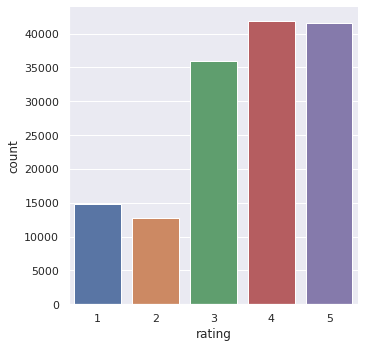

In [ ]:
sb.catplot(x = 'rating', data = train_raw, kind = 'count')
sb.set_style('whitegrid')
train_raw.dtypes

## Data Pre-processing

### Change 'rating' column from long format to wide format

In [ ]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(train_raw[['rating']]).toarray())

print(len(enc_df))
enc_df.head()

146811


,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [ ]:
# train_df = train_raw.drop(['rating'], axis = 1)
# train_df = pd.concat([train_df.reset_index(drop=True), enc_df.reset_index(drop=True)], axis=1)
train_df = train_raw
train_df.head()

,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1


In [ ]:
train_df.dtypes

review_id     int64
review       object
rating        int64
dtype: object

### Clean comments text

In [ ]:
train_df.head()

,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1


In [ ]:
have_emoji_train_idx = []
have_emoji_test_idx = []

for idx, review in enumerate(train_df['review']):
    if any(char in emoji.UNICODE_EMOJI for char in review):
        have_emoji_train_idx.append(idx)
        
for idx, review in enumerate(test_raw['review']):
    if any(char in emoji.UNICODE_EMOJI for char in review):
        have_emoji_test_idx.append(idx)

print(len(have_emoji_train_idx))
print(len(have_emoji_test_idx))

20048
7582


In [ ]:
repeated_rows_train = []
repeated_rows_test = []

for idx, review in enumerate(train_df['review']):
    if re.match(r'\w*(\w)\1+', review):
        repeated_rows_train.append(idx)
        
for idx, review in enumerate(test_raw['review']):
    if re.match(r'\w*(\w)\1+', review):
        repeated_rows_test.append(idx)

print(len(repeated_rows_train))
print(len(repeated_rows_test))

26146
10336


In [ ]:
# New function 'clean_text' created
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', '', text)
    text = re.sub(r':\(', 'dislike', text)
    text = re.sub(r': \(\(', 'dislike', text)
    text = re.sub(r':, \(', 'dislike', text)
    text = re.sub(r':\)', 'smile', text)
    text = re.sub(r';\)', 'smile', text)
    text = re.sub(r':\)\)\)', 'smile', text)
    text = re.sub(r':\)\)\)\)\)\)', 'smile', text)
    text = re.sub(r'=\)\)\)\)', 'smile', text)
    text = re.sub('[^a-z0-9 ]', ' ', text)
    tokenizer = text.split()
    return ' '.join([text for text in tokenizer])

# remove emojis
# def remove_emoji(text):
#   try:
#     return emoji.get_emoji_regexp().sub(u'', text)
#   except:
#     print(text)
#     return text
def remove_emoji(text):
    
    # Change emoji to text
    text = emoji.demojize(text).replace(":", " ")
    
    # Delete repeated emoji
    tokenizer = text.split()
    repeated_list = []
    
    for word in tokenizer:
        if word not in repeated_list:
            repeated_list.append(word)
    
    text = ' '.join(text for text in repeated_list)
    text = text.replace("_", " ").replace("-", " ")
    return text

def delete_repeated_char(text):
    
    text = re.sub(r'(\w)\1{2,}', r'\1', text)
    
    return text

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Removing stopwords

stop_words = stopwords.words('english')

def removestop(comrev):
    comrev = ' '.join(word for word in str(comrev).split() if word not in stop_words)
    return comrev

print(removestop("sent a light blue suit goods ga want a refund"))

sent light blue suit goods ga want refund


In [ ]:
train_df['review'] = train_df['review'].astype(str)
train_df['review'] = train_df['review'].apply(lambda x: clean_text(x))
train_df.loc[have_emoji_train_idx, 'review'] = train_df.loc[have_emoji_train_idx, 'review'].apply(remove_emoji)
train_df['review'] = train_df['review'].apply(lambda x: removestop(x))
train_df.loc[repeated_rows_train, 'review'] = train_df.loc[repeated_rows_train, 'review'].apply(delete_repeated_char)
train_df.head()

,review_id,review,rating
0,0,ga disappointed neat products meletot hilsnyaa...,1
1,1,rdtanya replace broken glass broken chargernya,1
2,2,nyesel bngt dsni shopping antecedent photo mes...,1
3,3,sent light blue suit goods ga want refund,1
4,4,pendants came dents scratches surface coating ...,1


In [ ]:
# drop the row that has noisy text or mislabeled rating
noisy_row = [31, 50, 2235, 5244, 10409, 11748, 12384, 14395, 15215, 17629, 20819, 23691, 32089, 39532, 40530, 43954, 48186, 50500, 55834, 60088,
             60442, 61095, 62982, 63803, 67464, 70791, 74861, 73636, 74119, 76275, 79789, 85745, 91058, 91663, 91800, 93204, 99295, 100903, 101177, 103155,
             109166, 109566, 109651, 109724, 110115, 110441, 111461, 113175, 115782, 116903, 118099, 118328, 118414, 119071, 125338, 125340, 129496, 129640, 
             132027, 138212, 131626, 134715, 133248, 136217, 141377, 143707, 145045, 146485, 37301, 6845, 15058, 30591, 59747, 95165]

train_df.drop(noisy_row, inplace=True)

In [ ]:
have_emoji_train_idx = []
repeated_rows_train = []
noisy_row = []

### Split into 3 categories first
1, 2 --> 0: Poor  
   3 --> 1: Neutral  
4, 5 --> 2: Good

In [ ]:
def conv_rating(rating):
  if rating == 1 or rating == 2:
    return 0
  elif rating == 3:
    return 1
  elif rating == 4 or rating == 5:
    return 2

In [ ]:
conv_rating(2)

0

In [ ]:
train_df['rating'] = train_df['rating'].apply(lambda x: conv_rating(x))

In [ ]:
# train_df[train_df['rating']==0]
train_df.head()

,review_id,review,rating
0,0,ga disappointed neat products meletot hilsnyaa...,1
1,1,rdtanya replace broken glass broken chargernya,1
2,2,nyesel bngt dsni shopping antecedent photo mes...,1
3,3,sent light blue suit goods ga want refund,1
4,4,pendants came dents scratches surface coating ...,1


review_id     int64
review       object
rating        int64
dtype: object

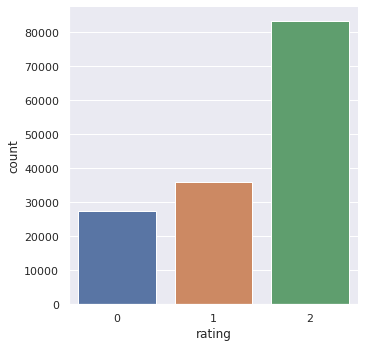

In [ ]:
sb.catplot(x = 'rating', data = train_df, kind = 'count')
sb.set_style('whitegrid')
train_raw.dtypes

### Take specific ratings

In [ ]:
rating_4 = train_df[train_df['rating']==4]
rating_5 = train_df[train_df['rating']==5]
train_df = pd.concat([rating_4, rating_5])
print(len(train_df))
train_df.head()

83380


,review_id,review,rating
63431,63431,product price good good delivery speed,4
63432,63432,children super happy although rich gift kinder...,4
63433,63433,beautiful bag thought little put phone,4
63434,63434,thanks sis sa freebie till next purchase,4
63435,63435,product quality excellent original product ori...,4


### Try to sample the data until all ratings are around 15k

In [ ]:
rating_1 = train_df[train_df['rating']==1].iloc[:15000]
rating_1.head()

,review_id,review,rating
0,0,ga disappointed neat products meletot hilsnyaa...,1
1,1,rdtanya replace broken glass broken chargernya,1
2,2,nyesel bngt dsni shopping antecedent photo mes...,1
3,3,sent light blue suit goods ga want refund,1
4,4,pendants came dents scratches surface coating ...,1


In [ ]:
rating_2 = train_df[train_df['rating']==2].iloc[:15000]
rating_3 = train_df[train_df['rating']==3].iloc[:15000]
rating_4 = train_df[train_df['rating']==4].iloc[:15000]
rating_5 = train_df[train_df['rating']==5].iloc[:15000]

In [ ]:
train_df = pd.concat([rating_1, rating_2, rating_3, rating_4, rating_5])
print(train_df.shape)
train_df.head()

(72490, 3)


,review_id,review,rating
0,0,ga disappointed neat products meletot hilsnyaa...,1
1,1,rdtanya replace broken glass broken chargernya,1
2,2,nyesel bngt dsni shopping antecedent photo mes...,1
3,3,sent light blue suit goods ga want refund,1
4,4,pendants came dents scratches surface coating ...,1


review_id     int64
review       object
rating        int64
dtype: object

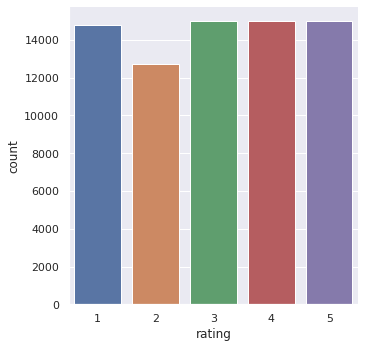

In [ ]:
sb.catplot(x = 'rating', data = train_df, kind = 'count')
sb.set_style('whitegrid')
train_df.dtypes

### Text augmentation

In [ ]:
review_augmented = []

aug = naw.ContextualWordEmbsAug(model_path='bert-base-multilingual-uncased', action='insert')

for review in train_df['review']:
    augmented_text = aug.augment(review)
    review_augmented.append(augmented_text)

train_aug = pd.DataFrame({'review': review_augmented,
                          'rating': train_df['rating']})

train_aug[train_aug['review'].str.len() >= 10].to_csv('review_aug_insert.csv', index=False)

train_aug =  pd.read_csv('./train_aug.csv')

train_df = pd.concat([train_df, train_aug], axis=0, ignore_index=True)

### Split data into train and validation set

In [ ]:
#shuffle
train_df = train_df.sample(frac=1).reset_index(drop=True)
train_df.head()

,review_id,review,rating
0,5611,buy clothes l intersects bits eat type ji,1
1,110936,excellent product quality excellent product pr...,5
2,90852,good product quality well priced product deliv...,4
3,8422,unsatisfactory quality tight cloth,1
4,131786,right choice buy cemilan2 millennial packing n...,5


In [ ]:
train_df["review"].iloc[53]

'alhamdulillah always happy shopping diladyfame addition material quality affordable price good fast delivery thanks ladyfame ku'

In [ ]:
train_df["rating"].iloc[53]

4

In [ ]:
X_train = train_df["review"].values
# y_train = train_df[[0, 1, 2, 3, 4]].values
y_train = train_df["rating"].values

In [ ]:
print(X_train[:3])
print(y_train[:3])

['nice value money' 'nice blouse'
 'product quality excellent original product']
[4 5 4]


##### For basic LSTM

In [ ]:
max_words = 1000
max_len = 150

In [ ]:
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)

sequences = tok.texts_to_sequences(X_train)
X_train = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
X_train[111]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

##### For BERT

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
# Print the original sentence.
print(' Original: ', X_train[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(X_train[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(X_train[0])))

 Original:  big finally g kepake
Tokenized:  ['big', 'finally', 'g', 'ke', '##pa', '##ke']
Token IDs:  [2502, 2633, 1043, 17710, 4502, 3489]


In [ ]:
max_len = 0

# For every sentence...
for rev in X_train:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(rev, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  263


In [ ]:
# Tokenize all of the sentences and map the tokens to their word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for rev in X_train:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        rev,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 210,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation = True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(y_train)

# Print sentence 0, now as a list of IDs.
print('Original: ', X_train[0])
print('Token IDs:', input_ids[0])

Original:  nice value money
Token IDs: tensor([ 101, 3835, 3643, 2769,  102,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
 

In [ ]:
def regular_encode(texts, tokenizer, maxlen=512):
    enc_di = tokenizer.batch_encode_plus(
             texts, 
             return_attention_mask=False, 
             return_token_type_ids=False,
             pad_to_max_length=True,
             max_length = maxlen,
             truncation = True)
    
    return np.array(enc_di['input_ids'])

In [ ]:
rating_mapper_encode = {1: 0,
                        2: 1,
                        3: 2,
                        4: 3,
                        5: 4}

train_df['rating'] = train_df['rating'].map(rating_mapper_encode)

In [ ]:
train_df.head(6)

,review_id,review,rating
0,5611,buy clothes l intersects bits eat type ji,0
1,110936,excellent product quality excellent product pr...,4
2,90852,good product quality well priced product deliv...,3
3,8422,unsatisfactory quality tight cloth,0
4,131786,right choice buy cemilan2 millennial packing n...,4
5,97573,son love,3


## Data pipeline

In [ ]:
labels[:20]

tensor([4, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4, 4])

In [ ]:
labels -= 4

In [ ]:
labels[:20]

tensor([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [ ]:
type(input_ids)

torch.Tensor

In [ ]:
# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

66,704 training samples
16,676 validation samples


In [ ]:
# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

## Modeling

### Simple LSTM

###### 1st try: just using raw data

In [ ]:
Inp = Input(name='inputs',shape=[max_len])
x = Embedding(max_words,50,input_length = max_len)(Inp)
x = LSTM(64, name='LSTM_1')(x)
x = Dense(512, activation='relu',name='Dense_1')(x)
x = Dropout(0.5, name='Dropout_1')(x)
x = Dense(512, activation='relu',name='Dense_2')(x)
x = Dropout(0.5, name='Dropout_2')(x)
out = Dense(5, activation='softmax', name='output')(x)

In [ ]:
model = Model(inputs=Inp,outputs=out)
model.compile(loss='binary_crossentropy',optimizer=Adam(lr = 0.001), metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
LSTM_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
Dense_1 (Dense)              (None, 512)               33280     
_________________________________________________________________
Dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 512)               0     

In [ ]:
# !mkdir checkpoints
!ls

checkpoints  sampleSubmission.csv  test.csv  train.csv


In [ ]:
early_stop = EarlyStopping(monitor='val_loss',min_delta=0.0001, patience = 5)
checkpoint = ModelCheckpoint(filepath="./checkpoints/LSTM_best_weights_2.hdf5",
                             save_best_only = True,  # Only save a model if `val_loss` has improved.
                             monitor = "val_loss",
                             verbose=1)

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size = 128,
                    epochs = 15,
                    validation_split = 0.1,
                    callbacks = [early_stop, checkpoint])

Epoch 1/15
1033/1033 [==============================] - ETA: 0s - loss: 0.3946 - accuracy: 0.4399
Epoch 00001: val_loss improved from inf to 0.36864, saving model to ./checkpoints/LSTM_best_weights.hdf5
1033/1033 [==============================] - 13s 13ms/step - loss: 0.3946 - accuracy: 0.4399 - val_loss: 0.3686 - val_accuracy: 0.4694
Epoch 2/15
1030/1033 [============================>.] - ETA: 0s - loss: 0.3648 - accuracy: 0.4820
Epoch 00002: val_loss improved from 0.36864 to 0.36015, saving model to ./checkpoints/LSTM_best_weights.hdf5
1033/1033 [==============================] - 13s 13ms/step - loss: 0.3647 - accuracy: 0.4821 - val_loss: 0.3601 - val_accuracy: 0.4834
Epoch 3/15
1032/1033 [============================>.] - ETA: 0s - loss: 0.3594 - accuracy: 0.4879
Epoch 00003: val_loss improved from 0.36015 to 0.35875, saving model to ./checkpoints/LSTM_best_weights.hdf5
1033/1033 [==============================] - 13s 13ms/step - loss: 0.3593 - accuracy: 0.4879 - val_loss: 0.3587 -

In [ ]:
history_1 = model.fit(X_train, y_train,
                    batch_size = 128,
                    epochs = 15,
                    validation_split = 0.1,
                    callbacks = [early_stop, checkpoint])

Epoch 1/15
1033/1033 [==============================] - ETA: 0s - loss: 0.3832 - accuracy: 0.4519
Epoch 00001: val_loss improved from inf to 0.37329, saving model to ./checkpoints/LSTM_best_weights_1.hdf5
1033/1033 [==============================] - 16s 15ms/step - loss: 0.3832 - accuracy: 0.4519 - val_loss: 0.3733 - val_accuracy: 0.4625
Epoch 2/15
1030/1033 [============================>.] - ETA: 0s - loss: 0.3642 - accuracy: 0.4806
Epoch 00002: val_loss improved from 0.37329 to 0.36218, saving model to ./checkpoints/LSTM_best_weights_1.hdf5
1033/1033 [==============================] - 15s 15ms/step - loss: 0.3642 - accuracy: 0.4806 - val_loss: 0.3622 - val_accuracy: 0.4824
Epoch 3/15
1033/1033 [==============================] - ETA: 0s - loss: 0.3590 - accuracy: 0.4862
Epoch 00003: val_loss improved from 0.36218 to 0.35946, saving model to ./checkpoints/LSTM_best_weights_1.hdf5
1033/1033 [==============================] - 15s 15ms/step - loss: 0.3590 - accuracy: 0.4862 - val_loss: 0.

In [ ]:
history_2 = model.fit(X_train, y_train,
                    batch_size = 128,
                    epochs = 20,
                    validation_split = 0.1,
                    callbacks = [early_stop, checkpoint])

Epoch 1/20
1033/1033 [==============================] - ETA: 0s - loss: 0.3957 - accuracy: 0.4299
Epoch 00001: val_loss improved from inf to 0.38284, saving model to ./checkpoints/LSTM_best_weights_2.hdf5
1033/1033 [==============================] - 13s 13ms/step - loss: 0.3957 - accuracy: 0.4299 - val_loss: 0.3828 - val_accuracy: 0.4497
Epoch 2/20
1031/1033 [============================>.] - ETA: 0s - loss: 0.3772 - accuracy: 0.4620
Epoch 00002: val_loss improved from 0.38284 to 0.37291, saving model to ./checkpoints/LSTM_best_weights_2.hdf5
1033/1033 [==============================] - 13s 12ms/step - loss: 0.3773 - accuracy: 0.4620 - val_loss: 0.3729 - val_accuracy: 0.4662
Epoch 3/20
1030/1033 [============================>.] - ETA: 0s - loss: 0.3722 - accuracy: 0.4680
Epoch 00003: val_loss improved from 0.37291 to 0.36937, saving model to ./checkpoints/LSTM_best_weights_2.hdf5
1033/1033 [==============================] - 12s 12ms/step - loss: 0.3722 - accuracy: 0.4682 - val_loss: 0.

### BERT

In [ ]:
# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2,    
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 3

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
# Helper function for formatting elapsed times as hh:mm:ss
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

##### BERT 5 labels

In [ ]:
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

    torch.save(model.state_dict(), "./BERT_{epoch_i}.pth")

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...
  Batch    40  of  2,039.    Elapsed: 0:01:15.
  Batch    80  of  2,039.    Elapsed: 0:02:31.
  Batch   120  of  2,039.    Elapsed: 0:03:46.
  Batch   160  of  2,039.    Elapsed: 0:05:02.
  Batch   200  of  2,039.    Elapsed: 0:06:17.
  Batch   240  of  2,039.    Elapsed: 0:07:33.
  Batch   280  of  2,039.    Elapsed: 0:08:48.
  Batch   320  of  2,039.    Elapsed: 0:10:03.
  Batch   360  of  2,039.    Elapsed: 0:11:19.
  Batch   400  of  2,039.    Elapsed: 0:12:34.
  Batch   440  of  2,039.    Elapsed: 0:13:50.
  Batch   480  of  2,039.    Elapsed: 0:15:05.
  Batch   520  of  2,039.    Elapsed: 0:16:20.
  Batch   560  of  2,039.    Elapsed: 0:17:36.
  Batch   600  of  2,039.    Elapsed: 0:18:51.
  Batch   640  of  2,039.    Elapsed: 0:20:07.
  Batch   680  of  2,039.    Elapsed: 0:21:22.
  Batch   720  of  2,039.    Elapsed: 0:22:38.
  Batch   760  of  2,039.    Elapsed: 0:23:53.
  Batch   800  of  2,039.    Elapsed: 0:25:08.
  Batch   840  of

##### Differentiating good, neutral and bad (3 labels)

In [ ]:
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

    torch.save(model.state_dict(), './BERT_{epoch_i}.pth')

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of  4,130.    Elapsed: 0:01:20.
  Batch    80  of  4,130.    Elapsed: 0:02:40.
  Batch   120  of  4,130.    Elapsed: 0:04:01.
  Batch   160  of  4,130.    Elapsed: 0:05:21.
  Batch   200  of  4,130.    Elapsed: 0:06:41.
  Batch   240  of  4,130.    Elapsed: 0:08:02.
  Batch   280  of  4,130.    Elapsed: 0:09:22.
  Batch   320  of  4,130.    Elapsed: 0:10:42.
  Batch   360  of  4,130.    Elapsed: 0:12:02.
  Batch   400  of  4,130.    Elapsed: 0:13:22.
  Batch   440  of  4,130.    Elapsed: 0:14:43.
  Batch   480  of  4,130.    Elapsed: 0:16:03.
  Batch   520  of  4,130.    Elapsed: 0:17:23.
  Batch   560  of  4,130.    Elapsed: 0:18:44.
  Batch   600  of  4,130.    Elapsed: 0:20:04.
  Batch   640  of  4,130.    Elapsed: 0:21:24.
  Batch   680  of  4,130.    Elapsed: 0:22:45.
  Batch   720  of  4,130.    Elapsed: 0:24:05.
  Batch   760  of  4,130.    Elapsed: 0:25:25.
  Batch   800  of  4,130.    Elapsed: 0:26:46.
  Batch   840  of

##### Differentiating ratings 4 and 5

In [ ]:
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print("This model is to differentiate the '4' ratings from the '5' ratings.\n")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

    torch.save(model.state_dict(), './BERT_good_epoch.pth')

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


This model is to differentiate the '0' ratings from the '1' ratings.

======== Epoch 1 / 3 ========
Training...
  Batch    40  of  2,085.    Elapsed: 0:00:44.
  Batch    80  of  2,085.    Elapsed: 0:01:32.
  Batch   120  of  2,085.    Elapsed: 0:02:19.
  Batch   160  of  2,085.    Elapsed: 0:03:06.
  Batch   200  of  2,085.    Elapsed: 0:03:53.
  Batch   240  of  2,085.    Elapsed: 0:04:41.
  Batch   280  of  2,085.    Elapsed: 0:05:28.
  Batch   320  of  2,085.    Elapsed: 0:06:15.
  Batch   360  of  2,085.    Elapsed: 0:07:02.
  Batch   400  of  2,085.    Elapsed: 0:07:49.
  Batch   440  of  2,085.    Elapsed: 0:08:36.
  Batch   480  of  2,085.    Elapsed: 0:09:23.
  Batch   520  of  2,085.    Elapsed: 0:10:10.
  Batch   560  of  2,085.    Elapsed: 0:10:57.
  Batch   600  of  2,085.    Elapsed: 0:11:44.
  Batch   640  of  2,085.    Elapsed: 0:12:31.
  Batch   680  of  2,085.    Elapsed: 0:13:18.
  Batch   720  of  2,085.    Elapsed: 0:14:05.
  Batch   760  of  2,085.    Elapsed: 0:1

##### Differentiating ratings 1 and 2

In [ ]:
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print("This model is to differentiate the '0' ratings from the '1' ratings.\n")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

    torch.save(model.state_dict(), './BERT_poor_epoch.pth')

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


This model is to differentiate the '0' ratings from the '1' ratings.

======== Epoch 1 / 4 ========
Training...
  Batch    40  of    688.    Elapsed: 0:00:45.
  Batch    80  of    688.    Elapsed: 0:01:32.
  Batch   120  of    688.    Elapsed: 0:02:19.
  Batch   160  of    688.    Elapsed: 0:03:07.
  Batch   200  of    688.    Elapsed: 0:03:54.
  Batch   240  of    688.    Elapsed: 0:04:41.
  Batch   280  of    688.    Elapsed: 0:05:28.
  Batch   320  of    688.    Elapsed: 0:06:16.
  Batch   360  of    688.    Elapsed: 0:07:03.
  Batch   400  of    688.    Elapsed: 0:07:51.
  Batch   440  of    688.    Elapsed: 0:08:38.
  Batch   480  of    688.    Elapsed: 0:09:26.
  Batch   520  of    688.    Elapsed: 0:10:13.
  Batch   560  of    688.    Elapsed: 0:11:00.
  Batch   600  of    688.    Elapsed: 0:11:48.
  Batch   640  of    688.    Elapsed: 0:12:35.
  Batch   680  of    688.    Elapsed: 0:13:23.

  Average training loss: 0.56
  Training epcoh took: 0:13:31

Running Validation...
  A

In [ ]:
# torch.save(model.state_dict(), "./BERT_best_weights.pth")

### XLM-RoBERTa

In [ ]:
def build_model(transformer, max_len=512):
    
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = Dense(5, activation='softmax')(cls_token) # 5 ratings to predict
    
    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
# For tf.dataset
AUTO = tf.data.experimental.AUTOTUNE

# Configuration
EPOCHS = 4
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
# MODEL = 'jplu/tf-xlm-roberta-large' # bert-base-multilingual-uncased
MODEL = 'jplu/tf-xlm-roberta-base'

In [ ]:
train_labels = to_categorical(train_df['rating'], num_classes=5)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_df['review'],
                                                  train_labels,
                                                  stratify=train_labels,
                                                  test_size=0.1,
                                                  random_state=2020)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((132067,), (14675,), (132067, 5), (14675, 5))

In [ ]:
# load tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [ ]:
MAX_LEN = 200

X_train = regular_encode(X_train.values, tokenizer, maxlen=MAX_LEN)
X_val = regular_encode(X_val.values, tokenizer, maxlen=MAX_LEN)

In [ ]:
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_train, y_train))
    .repeat()
    .shuffle(1024)
    .batch(BATCH_SIZE, drop_remainder = True)
    .prefetch(AUTO)
)

valid_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_val, y_val))
    .batch(BATCH_SIZE, drop_remainder = True)
    .cache()
    .prefetch(AUTO)
)

In [ ]:
%%time

with strategy.scope():
    transformer_layer = TFAutoModel.from_pretrained(MODEL)
    model = build_model(transformer_layer, max_len=MAX_LEN)
model.summary()

- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 200)]             0         
_________________________________________________________________
tf_roberta_model (TFRobertaM ((None, 200, 768), (None, 278043648 
_________________________________________________________________
tf_op_layer_strided_slice (T [(None, 768)]             0         
_________________________________________________________________
dense (Dense)                (None, 5)                 3845      
Total params: 278,047,493
Trainable params: 278,047,493
Non-trainable params: 0
_________________________________________________________________
CPU times: user 37.7 s, sys: 1min 19s, total: 1min 57s
Wall time: 2min 31s


In [ ]:
early_stop = EarlyStopping(monitor='val_loss',min_delta=0.0001, patience = 2)
checkpoint = ModelCheckpoint(filepath="./checkpoints/XLMRoBERTa_best_weights_1.hdf5",
                             save_best_only = True,  # Only save a model if `val_loss` has improved.
                             save_weights_only = True,
                             monitor = "val_loss",
                             verbose=1)

In [ ]:
steps = X_train.shape[0] // BATCH_SIZE

history = model.fit(
    train_dataset,
    steps_per_epoch = steps,
    validation_data = valid_dataset,
    epochs = EPOCHS,
    callbacks = [early_stop, checkpoint]
)

Epoch 1/4


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:431: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 192001536 elements. This may consume a large amount of memory.
  num_elements)


1031/1031 [==============================] - ETA: 0s - loss: 1.4431 - accuracy: 0.3212
Epoch 00001: val_loss improved from inf to 1.17421, saving model to ./checkpoints/XLMRoBERTa_best_weights.hdf5
1031/1031 [==============================] - 313s 303ms/step - loss: 1.4431 - accuracy: 0.3212 - val_loss: 1.1742 - val_accuracy: 0.4446
Epoch 2/4
1031/1031 [==============================] - ETA: 0s - loss: 1.1607 - accuracy: 0.4447
Epoch 00002: val_loss improved from 1.17421 to 1.09825, saving model to ./checkpoints/XLMRoBERTa_best_weights.hdf5
1031/1031 [==============================] - 293s 284ms/step - loss: 1.1607 - accuracy: 0.4447 - val_loss: 1.0983 - val_accuracy: 0.4730
Epoch 3/4
1031/1031 [==============================] - ETA: 0s - loss: 1.1017 - accuracy: 0.4709
Epoch 00003: val_loss improved from 1.09825 to 1.08915, saving model to ./checkpoints/XLMRoBERTa_best_weights.hdf5
1031/1031 [==============================] - 293s 285ms/step - loss: 1.1017 - accuracy: 0.4709 - val_los

In [ ]:
history.epoch[-1]

3

In [ ]:
EPOCHS = 8

history1 = model.fit(
    train_dataset,
    steps_per_epoch = steps,
    validation_data = valid_dataset,
    initial_epoch = history.epoch[-1],
    epochs = EPOCHS,
    callbacks = [early_stop, checkpoint]
)

Epoch 4/8
1031/1031 [==============================] - ETA: 0s - loss: 1.0453 - accuracy: 0.4908
Epoch 00004: val_loss improved from inf to 1.05862, saving model to ./checkpoints/XLMRoBERTa_best_weights_1.hdf5
1031/1031 [==============================] - 297s 288ms/step - loss: 1.0453 - accuracy: 0.4908 - val_loss: 1.0586 - val_accuracy: 0.4859
Epoch 5/8
1031/1031 [==============================] - ETA: 0s - loss: 1.0269 - accuracy: 0.4960
Epoch 00005: val_loss did not improve from 1.05862
1031/1031 [==============================] - 288s 279ms/step - loss: 1.0269 - accuracy: 0.4960 - val_loss: 1.0599 - val_accuracy: 0.4911
Epoch 6/8
1031/1031 [==============================] - ETA: 0s - loss: 1.0098 - accuracy: 0.5038
Epoch 00006: val_loss did not improve from 1.05862
1031/1031 [==============================] - 287s 278ms/step - loss: 1.0098 - accuracy: 0.5038 - val_loss: 1.0671 - val_accuracy: 0.4884


## Making Predictions

In [ ]:
model.load_weights('./checkpoints/XLMRoBERTa_best_weights_5.hdf5')

# device = torch.device('cpu')
# model.load_state_dict(torch.load("./BERT_poor_epoch_2.pth", map_location = device))
# model.eval()

In [ ]:
print(len(test_raw))
test_raw.head()

60427


,review_id,review
0,1,"Great danger, cool, motif and cantik2 jg model..."
1,2,One of the shades don't fit well
2,3,Very comfortable
3,4,Fast delivery. Product expiry is on Dec 2022. ...
4,5,it's sooooo cute! i like playing with the glit...


In [ ]:
test_raw['review'] = test_raw['review'].astype(str)
test_raw['review'] = test_raw['review'].apply(lambda x: removestop(x))
test_raw['review'] = test_raw['review'].apply(lambda x: clean_text(x))
test_raw.loc[have_emoji_test_idx, 'review'] = test_raw.loc[have_emoji_test_idx, 'review'].apply(remove_emoji)
test_raw.loc[repeated_rows_test, 'review'] = test_raw.loc[repeated_rows_test, 'review'].apply(delete_repeated_char)
test_raw.head()

,review_id,review
0,1,great danger cool motif cantik2 jg models deli...
1,2,one shades fit well
2,3,comfortable
3,4,fast delivery product expiry dec 2022 product ...
4,5,sooooo cute like playing glitters better brows...


In [ ]:
X_test = test_raw["review"].values

##### LSTM

In [ ]:
tok.fit_on_texts(X_test)

sequences = tok.texts_to_sequences(X_test)
X_test = sequence.pad_sequences(sequences, maxlen = max_len)

In [ ]:
print(len(X_test))
X_test[0].shape

60427


(150,)

In [ ]:
a = np.array([X_test[0]])
a.shape

(1, 150)

In [ ]:
y = model.predict(a)

In [ ]:
y.shape

(1, 5)

In [ ]:
test_raw["review"].values[0]

'great danger, cool, motif and cantik2 jg models. delivery cepet. tp packing less okay krn only wear clear plastic nerawang klihtan contents jd'

In [ ]:
y

array([[0.40020514, 0.2670463 , 0.2528953 , 0.04010465, 0.03974864]],
      dtype=float32)

In [ ]:
for x in range(len(test_raw)):
    pred_arr = model.predict(np.array([X_test[x]]))
    pred = np.argmax(pred_arr)
    pred += 1
    test_raw['review'].iloc[x] = pred

test_raw.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,review_id,review
0,1,1
1,2,5
2,3,1
3,4,5
4,5,4


##### BERT

In [ ]:
max_len = 0

# For every sentence...
for rev in X_test:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(rev, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  181


In [ ]:
# Tokenize all of the sentences and map the tokens to their word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for rev in X_test:
    encoded_dict = tokenizer.encode_plus(
                        rev,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 210,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation = True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

# Print sentence 0, now as a list of IDs.
print('Original: ', X_test[0])
print('Token IDs:', input_ids[0])

Original:  Great danger, cool, motif and cantik2 jg models. Delivery cepet. Tp packing less okay krn only wear clear plastic nerawang klihtan contents jd
Token IDs: tensor([  101,  2307,  5473,  1010,  4658,  1010, 16226,  1998,  2064,  3775,
         2243,  2475,  1046,  2290,  4275,  1012,  6959,  8292, 22327,  1012,
         1056,  2361, 14743,  2625,  3100,  1047,  6826,  2069,  4929,  3154,
         6081, 11265,  2527, 16600,  1047,  3669, 22893,  2078,  8417, 26219,
          102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0

In [ ]:
attention_masks[0].shape

torch.Size([210])

In [ ]:
input_ids[0].shape

torch.Size([210])

In [ ]:
# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions = []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  
  # Store predictions and true labels
  predictions.append(logits)

print('    DONE.')
print(predictions[:5])

Predicting labels for 60,427 test sentences...
    DONE.
[array([[-1.9762735 ,  1.1098326 ,  1.5487819 ],
       [-0.53538805,  1.3891801 ,  0.08182217],
       [-1.3433073 ,  0.76564926,  1.3389164 ],
       [-1.7738141 , -0.05901035,  1.9307495 ],
       [-2.6973462 ,  0.2618049 ,  3.083851  ],
       [ 0.5008199 ,  0.46554267, -0.5642729 ],
       [-0.97600543,  0.58386415,  0.92295504],
       [-1.969233  ,  0.6021631 ,  2.0228786 ],
       [ 0.89161336,  0.40244585, -1.0836397 ],
       [-1.0813419 ,  1.039094  ,  0.56280077],
       [-0.07296357,  0.5264265 ,  0.14213072],
       [-3.204545  , -0.96555424,  4.1598706 ],
       [-2.0965064 ,  0.89095354,  1.7095503 ],
       [-2.6045268 ,  0.44796553,  2.756565  ],
       [-0.5306326 , -0.06775521,  1.0670553 ],
       [-2.2410426 ,  0.50493515,  2.2955177 ],
       [-1.8261654 ,  0.16447437,  2.3128324 ],
       [ 2.5119457 , -0.18644196, -2.1477818 ],
       [-2.024051  ,  0.18665072,  2.4822047 ],
       [-0.17988753,  1.250542

In [ ]:
pred_labels_i = np.argmax(predictions[0], axis=1).flatten()
print(len(pred_labels_i))
pred_labels_i

32


array([2, 1, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1])

In [ ]:
len(predictions)

1889

In [ ]:
submission_df = test_raw

In [ ]:
for x in range(len(predictions)):
  pred_labels_i = np.argmax(predictions[x], axis=1).flatten()
  for y in range(len(pred_labels_i)):
    pred_labels_i[y] += 1
    submission_df['review'].iloc[x*32+y] = pred_labels_i[y]
submission_df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,review_id,review
0,1,2
1,2,1
2,3,2
3,4,2
4,5,2


##### XLM-RoBERTa

In [ ]:
X_test = regular_encode(test_raw['review'].values, tokenizer, maxlen=MAX_LEN)

In [ ]:
test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(X_test)
    .batch(BATCH_SIZE)
)

In [ ]:
pred = model.predict(test_dataset, verbose=1)

473/473 [==============================] - 39s 82ms/step


In [ ]:
np.save('xlm-roberta_5', pred)

In [ ]:
pred = np.argmax(pred, axis=1)
print(pred)

[2 2 4 ... 4 4 4]


In [ ]:
submission_df = pd.DataFrame({'review_id': test_raw['review_id'],
                           'rating': pred})
submission_df.head(-1)

,review_id,rating
0,1,2
1,2,2
2,3,4
3,4,4
4,5,4
...,...,...
60421,60422,4
60422,60423,4
60423,60424,2
60424,60425,4


In [ ]:
rating_mapper_decode = {0: 1,
                        1: 2,
                        2: 3,
                        3: 4,
                        4: 5}

submission_df['rating'] = submission_df['rating'].map(rating_mapper_decode)
submission_df.head()

,review_id,rating
0,1,3
1,2,3
2,3,5
3,4,5
4,5,5


In [ ]:
submission_df[submission_df['rating']==5]

,review_id,rating
2,3,5
3,4,5
4,5,5
6,7,5
7,8,5
...,...,...
60421,60422,5
60422,60423,5
60424,60425,5
60425,60426,5


### Post-processing

In [ ]:
submission_df.columns = ['review_id', 'rating']
submission_df.head(-1)

,review_id,rating
0,1,5
1,2,3
2,3,5
3,4,5
4,5,5
...,...,...
60421,60422,1
60422,60423,5
60423,60424,3
60424,60425,5


In [ ]:
test_raw = pd.merge(test_raw, submission_df, on='review_id')
print(len(test_raw))
test_raw.head(20)

60427


,review_id,review,rating
0,1,"Great danger, cool, motif and cantik2 jg model...",5
1,2,One of the shades don't fit well,3
2,3,Very comfortable,5
3,4,Fast delivery. Product expiry is on Dec 2022. ...,5
4,5,it's sooooo cute! i like playing with the glit...,5
5,6,They 're about a 1/2 inch longer than the broo...,1
6,7,The quality not good and receved the slipper i...,5
7,8,Nice quality of Cotton & cute .. design .. acc...,5
8,9,which is easy as can be ( just lifting up the ...,1
9,10,"Shipping was fast too soon, ordered Tuesday to...",3


In [ ]:
input_ids.to(device)
attention_masks.to(device)

In [ ]:
for i in range(len(test_raw)):
  if test_raw['rating'].iloc[i] == 1:
    b = input_ids[i].shape[0]
    a = torch.reshape(input_ids[i], (1,b))
    c = torch.reshape(input_ids[i], (1,b))
    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = model(a, token_type_ids=None, 
                        attention_mask=c)
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    pred_labels = np.argmax(logits, axis=1).flatten()
    pred_labels += 1
    submission_df['rating'].iloc[i] = pred_labels

submission_df.head()

,review_id,rating
0,1,5
1,2,3
2,3,5
3,4,5
4,5,5


In [ ]:
def to_5lab(x):
  if x == 0:
    return 1
  elif x == 1:
    return 3
  elif x == 2:
    return 5
  else:
    print("Warning: number not in range.", x, " was called to function to_5lab().")

In [ ]:
submission_df['rating'] = submission_df['rating'].apply(lambda x: to_5lab(x))
submission_df.head(10)

,review_id,rating
0,1,5
1,2,3
2,3,5
3,4,5
4,5,5
5,6,1
6,7,5
7,8,5
8,9,1
9,10,3


In [ ]:
submission_df.to_csv('submission.csv', index = False)